In [1]:
# import packages
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '2'



In [2]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import time
from tensorflow.keras.utils import plot_model
import numpy as np


if not os.path.exists('output'):
    os.makedirs('output')

In [3]:
# 获取默认的 GPU 设备
default_gpu = tf.test.gpu_device_name()
print(default_gpu)

print(tf.config.list_physical_devices('GPU'))


/device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]


2024-11-15 02:02:43.860198: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-15 02:02:45.087133: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 33147 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:18:00.0, compute capability: 8.0
2024-11-15 02:02:45.089166: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:1 with 26279 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:5e:00.0, compute capability: 8.0
2024-11-15 02:02:45.089741: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:2 with 660 MB memory:  -> device: 2, name: NVIDIA TITAN RTX, pci bus id: 0000:

In [4]:
print("~~~~~~~~~~~MENU~~~~~~~~~~~~~")
print("1: COLORS")
print("2: COLORS_SHAPE")
print("3: 12-CHANNELS")
print("4: CIFAR-10")
print("Note: Run create_noisy_colors.py if first time running software")
datamenu1 = 4

datamenu2 = 0.001

datamenu3 = 7
    
print("Select models to run sequentially (y/n): ")

model1 = input('CO-QCNN (U1): ')

model6 = input('CO-QCNN (U2): ')

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# choose dataset to train on

if datamenu1 == 1: 
    datatype = "COLORS"
if datamenu1 == 2: 
    datatype = "COLORS_SHAPE"
if datamenu1 == 3: 
    datatype = "CHANNELS"
if datamenu1 == 4: 
    datatype = "CIFAR10"
    

# choose hyperparameters
num_of_epochs = 50
global_learning_rate = datamenu2
global_batch_size = 128

#classes of CIFAR-10 dataset
classes = datamenu3

# choose image size
resize_x = 10 
resize_y = 10 

# import project functions


~~~~~~~~~~~MENU~~~~~~~~~~~~~
1: COLORS
2: COLORS_SHAPE
3: 12-CHANNELS
4: CIFAR-10
Note: Run create_noisy_colors.py if first time running software
Select models to run sequentially (y/n): 


CO-QCNN (U1):  n
CO-QCNN (U2):  y


~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [5]:
from prepare_data import datasize, build_model_datasets
import generate_output
import models

# list containing train size, image size x, image size y, learning_rate, batch size, test size, dataset, number of epochs
details = [datasize(datatype,classes)[0],resize_x,resize_y,global_learning_rate,global_batch_size,datasize(datatype,classes)[1],datatype,num_of_epochs]

# set model to True to run
############################
if model1 == "y":
    CO_U1_QCNN = True 
else:
    CO_U1_QCNN = False 


if model6 == "y":
    CO_U2_QCNN = True 
else:
    CO_U2_QCNN = False 
    

        

#############################
models_to_train = []
#############################
if CO_U1_QCNN:
    models_to_train.append(models.CO_U1_QCNN_model(datatype,classes))
    

if CO_U2_QCNN:
    models_to_train.append(models.CO_U2_QCNN_model(datatype,classes))

     
#############################

def train_model(model_to_train,classes):
    model = model_to_train
##########################
# print the architecture of the model
    model.summary()
############################
# grab the time the training starts, output folder will be named with this time
    timestr_ = time.strftime("%Y%m%d-%H%M%S")
# compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=global_learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# preprocess the chosen dataset
    model_data = build_model_datasets(datatype,details,classes)
# begin to train the model
    model_history = model.fit(model_data[0], model_data[2], validation_data=(model_data[1],model_data[3]) , epochs=num_of_epochs, batch_size=global_batch_size)
# create timestampped folder to save output
    os.mkdir('output/'+timestr_)
# create confusion matrix
    print("CONFUSION MATRIX")
    classes = model_data[4]
    y_pred = model.predict(model_data[1])
    y_pred = np.argmax(y_pred, axis=-1)
    y_pred = y_pred.flatten()
    if datatype == "CHANNELS" or datatype == "CIFAR10":
        y_true = model_data[3].flatten()
    else:
        y_true = model_data[3].numpy().flatten()
    confusion_mtx = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(16, 16))
    plt.figure()
    plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    timestr = time.strftime("%Y%m%d-%H%M%S")
    plt.savefig('output/'+timestr_+'/'+timestr+'_confusion_matrix.png', bbox_inches='tight')

# create learning curves plot
    print("GENERATE LEARNING CURVES")
    generate_output.save_output_imgs(model,model_history,details,timestr_)



2024-11-15 02:03:01.918289: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 33147 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:18:00.0, compute capability: 8.0
2024-11-15 02:03:01.919813: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 26279 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:5e:00.0, compute capability: 8.0
2024-11-15 02:03:01.920004: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 660 MB memory:  -> device: 2, name: NVIDIA TITAN RTX, pci bus id: 0000:86:00.0, compute capability: 7.5


Circuit Depth: 18


Model: "CO_U2_QCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 10, 10, 3)]       0         
                                                                 
 CO_U2_QCNN (U2_circuit)     (None, 9, 9, 5)           105       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 5)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 32)                2592      
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                        

Filtering Testing Images: 100%|██████████████████████████████████████████████████| 7000/7000 [00:02<00:00, 2964.84it/s]


Train Shape: (4480, 32, 32, 3)
Test Shape: (700, 32, 32, 3)
Epoch 1/50


2024-11-15 02:04:32.432533: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8902
2024-11-15 02:04:32.476408: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


35/35 [==============================] - 217s 6s/step - loss: 1.9502 - accuracy: 0.1529 - val_loss: 1.9423 - val_accuracy: 0.1471
Epoch 2/50
35/35 [==============================] - 214s 6s/step - loss: 1.9367 - accuracy: 0.1935 - val_loss: 1.9318 - val_accuracy: 0.2043
Epoch 3/50
35/35 [==============================] - 186s 5s/step - loss: 1.9221 - accuracy: 0.2129 - val_loss: 1.9140 - val_accuracy: 0.2329
Epoch 4/50
35/35 [==============================] - 185s 5s/step - loss: 1.8961 - accuracy: 0.2379 - val_loss: 1.8875 - val_accuracy: 0.2343
Epoch 5/50
35/35 [==============================] - 185s 5s/step - loss: 1.8630 - accuracy: 0.2578 - val_loss: 1.8580 - val_accuracy: 0.2371
Epoch 6/50
35/35 [==============================] - 179s 5s/step - loss: 1.8296 - accuracy: 0.2705 - val_loss: 1.8265 - val_accuracy: 0.2600
Epoch 7/50
35/35 [==============================] - 191s 6s/step - loss: 1.7995 - accuracy: 0.2819 - val_loss: 1.7990 - val_accuracy: 0.2571
Epoch 8/50
35/35 [======

<Figure size 1600x1600 with 0 Axes>

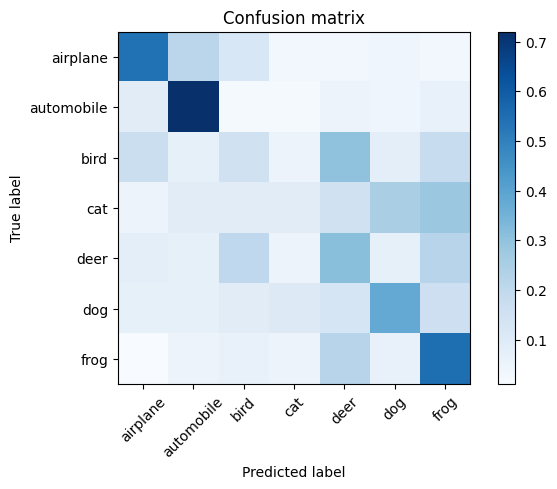

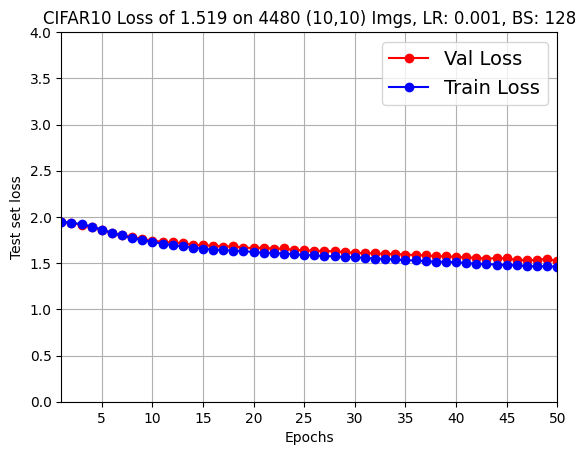

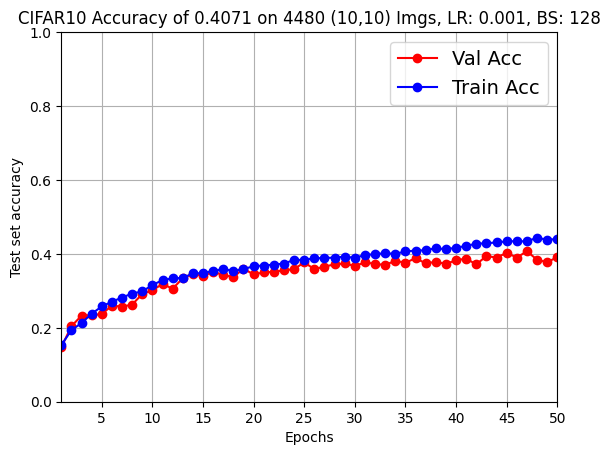

In [6]:
# train all chosen models
for x in models_to_train:
    train_model(x,classes)

Training Images Per Class: 500
